In [1]:
import math
import numpy as np
from pprint import pprint

f = open("Target_predicted_10.msp")

for i in range(0, 1000):
    line = f.readline()
    print(line)
    
f.close()

Name: AAAAAAAAAAAAAAAGAGAGAK/2

MW: 798.9189858349997

Comment: Parent=798.9189858349997 Collision_energy=29 Mods=0 ModString=AAAAAAAAAAAAAAAGAGAGAK///2 iRT=74.8855209350586 proteotypicity=10.95544719696045

Num peaks: 46

143.081497	6085.441775587814	"b4^2/0.0ppm, b2/0.0ppm"

147.112808	7324.319236737564	"y1/0.0ppm"

178.600067	855.1785214423726	"b5^2/0.0ppm"

214.118622	26043.443615079937	"b6^2/0.0ppm, b3/0.0ppm"

218.149918	3547.800948616138	"y2/0.0ppm"

249.637177	2333.697135327515	"b7^2/0.0ppm"

275.171387	10958.535350727556	"y3/0.0ppm"

285.155731	45108.71632515121	"b8^2/0.0ppm, b4/0.0ppm"

320.674286	4384.545535232712	"b9^2/0.0ppm"

346.208496	9973.929149317799	"y4/0.0ppm"

356.192841	73791.13864172137	"b10^2/0.0ppm, b5/0.0ppm"

391.711395	6839.96516083852	"b11^2/0.0ppm"

403.229950	18644.80343475899	"y5/0.0ppm"

427.229950	96007.63886653734	"b12^2/0.0ppm, b6/0.0ppm"

462.748505	3992.653735602756	"b13^2/0.0ppm"

474.267059	12968.224382926472	"y6/0.0ppm"

498.267059	100000.0	"b14

In [2]:
def DotProduct(MS2, LIB):
    mz = [0]
    lib = [0]
    ms2 = [0]
    
    libidx = 0
    ms2idx = 0
    
    while True:
        if libidx == len(LIB):
            while True:
                if ms2idx == len(MS2): break
                mz += [MS2[ms2idx][0]]
                lib += [0]
                ms2 += [MS2[ms2idx][1]]
                ms2idx += 1
            break
        if ms2idx == len(MS2):
            while True:
                if libidx == len(LIB): break
                mz += [LIB[libidx][0]]
                lib += [LIB[libidx][1]]
                ms2 += [0]
                libidx += 1
            break
    
        if abs(LIB[libidx][0] - MS2[ms2idx][0]) <= 0.05:
            mz += [(LIB[libidx][0] + MS2[ms2idx][0]) / 2]
            lib += [LIB[libidx][1]]
            ms2 += [MS2[ms2idx][1]]
            libidx += 1
            ms2idx += 1
        elif LIB[libidx][0] < MS2[ms2idx][0]:
            mz += [LIB[libidx][0]]
            lib += [LIB[libidx][1]]
            ms2 += [0]
            libidx += 1
        else:
            mz += [MS2[ms2idx][0]]
            lib += [0]
            ms2 += [MS2[ms2idx][1]]
            ms2idx += 1

    del mz[0]
    del lib[0]
    del ms2[0]
    
    similarity = np.dot(lib, ms2) / math.sqrt(np.dot(lib, lib) * np.dot(ms2, ms2))
    
    return similarity

In [25]:
f = open("Target_predicted_10.msp")
total = 0
TP = []

while True:
    if not total:
        line = f.readline()
    
    if not line: break
    
    if line.startswith('Name: '):
        total += 1
        if not total % 10000:
            print(total)
        
        charge = line[-2]
        line = f.readline()
        line = f.readline()
        
        comment = line.split(' ')
        parent = comment[1].split('=')[1]
        pep = [int(charge), float(parent)]
        
        line = f.readline()
        line = f.readline()
        
        peaks = []
        
        while True:
            if not line: break
            if line.startswith('Name: '): break
            
            data = line.split('\t')
            mz = float(data[0])
            inten = float(data[1])
            peak = [mz, math.sqrt(inten)]
            peaks.append(peak)
            
            line = f.readline()
        
        pep.append(peaks)
        TP.append(pep)
        
f.close()
print(total)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
374997


In [26]:
TP.sort(key = lambda x:x[1])

In [28]:
pprint(TP[0])
file = open('Similarity_TP.txt', 'w')

for i in range(len(TP)):
    if not i % 10000:
        print(i)
    
    for j in range(i + 1, len(TP)):
        if (TP[i][1] + 3.0) >= TP[j][1] and TP[i][0] == TP[j][0]:
            file.write(str(DotProduct(TP[i][2], TP[j][2])))
            file.write("\n")
        else:
            break

[4,
 223.37205841749997,
 [[81.388161, 6.220932405998316],
  [144.605148, 22.640671368137475],
  [175.118958, 233.28180383390387],
  [190.108047, 12.095453691366853],
  [213.134598, 26.353367906208877],
  [217.122467, 80.17293807763315],
  [239.466125, 5.394441583704471],
  [240.801514, 21.858636736997116],
  [256.650604, 86.62505411253721],
  [259.808655, 44.30462729783425],
  [288.203003, 198.52506139024362],
  [325.180084, 221.92295960535492],
  [360.698639, 43.45342334039977],
  [379.208832, 14.223220451079285],
  [425.261932, 184.5117882412937],
  [512.293945, 316.22776601683796],
  [649.352844, 86.3649234353855]]]
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000


In [29]:
f = open("revDecoy_predicted_10.msp")

for i in range(0, 1000):
    line = f.readline()
    print(line)
    
f.close()

Name: AGAGAGAAAAAAAAAAAAAAAK/2_0

MW: 1597.8526

Comment: Consensus Pep=Tryptic Peptype=<Protein><Peptide><Protein> Mods=0 Fullname=R.AGAGAGAAAAAAAAAAAAAAAK.Q Charge=2 Parent=798.9263 CE=42.09 NCE=29.43 Q-value=0.0000 Nprot=1 Protein="XXX_sp|P55011|S12A2_HUMAN(pre=R,post=Q)" Nrep=134/200 Theo_mz_diff=1.2ppm Quality=7/7 MC=0 MCtype=Normal Unassigned_all_20ppm=0.1424 Unassigned_20ppm=0.0416 num_unassigned_peaks_20ppm=44 max_unassigned_ab_20ppm=0.41 top_20_num_unassigned_peaks_20ppm=1/20

Num peaks: 55

129.065857	1731.715165	"b2/0.0ppm"

147.112808	7357.145846	"y1/0.0ppm"

193.095139	470.094429	"b6^2/0.0ppm"

200.102966	7541.441917	"b3/0.0ppm"

218.149918	10914.024711	"y2/0.0ppm"

228.613693	593.363727	"b7^2/0.0ppm"

257.124420	30958.038568	"b4/0.0ppm"

264.132263	828.194432	"b8^2/0.0ppm"

289.187042	14994.238317	"y3/0.0ppm"

299.650818	1066.651847	"b9^2/0.0ppm"

328.161560	42962.71503	"b5/0.0ppm"

335.169373	1600.703038	"b10^2/0.0ppm"

360.224152	17421.285808	"y4/0.0ppm"

370.687927	235

In [34]:
f = open("revDecoy_predicted_10.msp")
total = 0
RP = []

while True:
    if not total:
        line = f.readline()
    
    if not line: break
    
    if line.startswith('Name: '):
        total += 1
        if not total % 10000:
            print(total)
        
        line = f.readline()
        line = f.readline()
        
        comment = line.split(' ')
        charge = comment[6].split('=')[1]
        parent = comment[7].split('=')[1]
        pep = [int(charge), float(parent)]
        
        line = f.readline()
        line = f.readline()
        
        peaks = []
        while True:
            if not line: break
            if line.startswith('Name: '): break
            
            data = line.split('\t')
            mz = float(data[0])
            inten = float(data[1])
            peak = [mz, math.sqrt(inten)]
            peaks.append(peak)
            
            line = f.readline()
            
        pep.append(peaks)
        RP.append(pep)
        
f.close()
print(total)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
374994


In [36]:
RP.sort(key = lambda x:x[1])

In [37]:
file = open('Similarity_RP.txt', 'w')

for i in range(len(RP)):
    if not i % 10000:
        print(i)
    
    for j in range(i + 1, len(RP)):
        if (RP[i][1] + 3.0) >= RP[j][1] and RP[i][0] == RP[j][0]:
            file.write(str(DotProduct(RP[i][2], RP[j][2])))
            file.write("\n")
        else:
            break

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000


In [38]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
TP = []

file = open("Similarity_TP.txt", "r")
while True:
    line = file.readline()
    if not line: break
    if not line == "\n":
        TP.append(float(line[:-1]))
file.close()

In [40]:
TP

[0.14604838382750102,
 0.15920225425720558,
 0.18198141553397415,
 0.14664995205019118,
 0.09941197061291507,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.31015009164123664,
 0.15740648468390253,
 0.0,
 0.21136989351209368,
 0.0,
 0.0,
 0.1677045156924235,
 0.09386015108332217,
 0.0,
 0.0,
 0.09644252766321171,
 0.0,
 0.0,
 0.08896904450356162,
 0.1431218760931081,
 0.0,
 0.0,
 0.14705959169048227,
 0.023298571624953617,
 0.0,
 0.33934096598406593,
 0.0,
 0.03508597752550191,
 0.08230568769916505,
 0.0,
 0.0,
 0.07592769050366265,
 0.0,
 0.43309873530710064,
 0.010394726937270737,
 0.08173069475164717,
 0.1270239583143639,
 0.09165194678688669,
 0.0,
 0.08097014711805596,
 0.022893743726242668,
 0.0,
 0.08282423316595418,
 0.0,
 0.1141648692926307,
 0.0,
 0.0,
 0.0069494546324703685,
 0.3642813063924905,
 0.025458241972997186,
 0.0,
 0.09210199058661596,
 0.0,
 0.12695332410556312,
 0.0,
 0.0,
 0.10713558643986065,
 0.012654660412384972,
 0.0,
 0.38809081567751474,
 0.0,
 0.07087483967433134,
 0.0

In [41]:
RP = []

file = open("Similarity_RP.txt", "r")
while True:
    line = file.readline()
    if not line: break
    if not line == "\n":
        RP.append(float(line[:-1]))
file.close()

In [42]:
RP

[0.12820914710161746,
 0.1468357557970614,
 0.16779061493012337,
 0.22336404578713576,
 0.1029349656404413,
 0.0,
 0.0,
 0.031460890566968346,
 0.0,
 0.0,
 0.3166661480124486,
 0.16598169886258637,
 0.0,
 0.392208732479514,
 0.0,
 0.030115318779956896,
 0.17081231407188874,
 0.21516088524287647,
 0.0,
 0.0,
 0.1796174403590886,
 0.0,
 0.0,
 0.2636827564611984,
 0.273273452452034,
 0.0,
 0.17725979221176055,
 0.14067340943799023,
 0.23049522199548225,
 0.0,
 0.2065119750467879,
 0.0,
 0.1289727267286167,
 0.17719691621338923,
 0.0,
 0.0,
 0.26012936834062983,
 0.11703347790159413,
 0.2070226755699662,
 0.0,
 0.1749544796025444,
 0.1526101143106713,
 0.1256940760758811,
 0.11643378897924876,
 0.10137326533230567,
 0.026697574343229596,
 0.0,
 0.14773366287422904,
 0.0,
 0.2070475745662867,
 0.09031257411501734,
 0.0,
 0.007793965544618528,
 0.12381028450531428,
 0.032606568055213454,
 0.0,
 0.37845318809627293,
 0.0,
 0.1980132459630887,
 0.11030152238791714,
 0.0,
 0.09060026264072446,


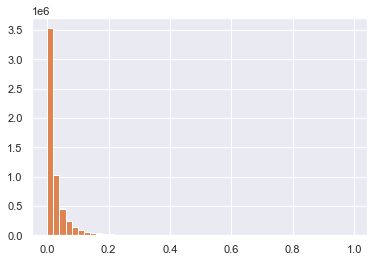

In [47]:
nnt3 = plt.hist(TP, bins = 50)
nnd3 = plt.hist(RP, bins = 50)

0.019682473268928392
0.019845531892892197


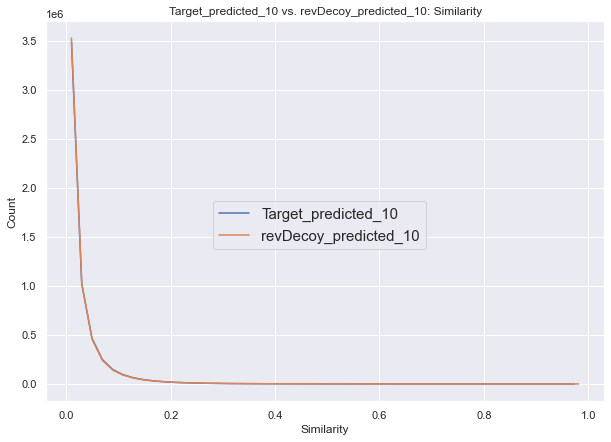

In [54]:
print(nnt3[1][1] - nnt3[1][0])
print(nnd3[1][1] - nnd3[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Similarity')
plt.ylabel('Count')
plt.title('Target_predicted_10 vs. revDecoy_predicted_10: Similarity')
plt.plot(nnt3[1][:-1] + 0.0095, nnt3[0], label = 'Target_predicted_10')
plt.plot(nnd3[1][:-1] + 0.0095, nnd3[0], label = 'revDecoy_predicted_10')
plt.legend(loc = (0.3, 0.4), fontsize = 15)
plt.show()